In [529]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [530]:
window_size = 200
dataset_chosen = "Arabic-digit"
detectors = ["CDT", "IBDD", "IKS", "WRS", "BASELINE"]

In [531]:
dataset_test = pd.read_csv(f"datasets/test/{dataset_chosen}.test.csv")

In [532]:
proportions = []
detector_info = {"detector":[], "accuracy":[], "drifts_detected":[], "total_time / instance_time (s)":[], "context_portion":[]}

In [533]:
def plot_accuracy(classification:list, final_acc:list):
    for i in range(0, len(classification), window_size):
        mean_acc = np.mean(classification[i:i+window_size])
        final_acc.append(mean_acc)
    
    return final_acc

In [534]:
def plot_proportions(proportions:list, final_prop):
    for i in range(0, len(proportions), window_size):
        mean_prop = np.mean(proportions[i:i+window_size])
        final_prop.append(mean_prop)
    
    return final_prop

BASELINE -> []
CDT -> [258, 656]
IBDD -> [666, 3946, 4537, 5390, 5999, 6829]
IKS -> [648, 804, 1058]
WRS -> [526, 598, 652, 882, 1762, 1957, 3865, 4754, 5264, 5620, 6108, 6518, 7636]


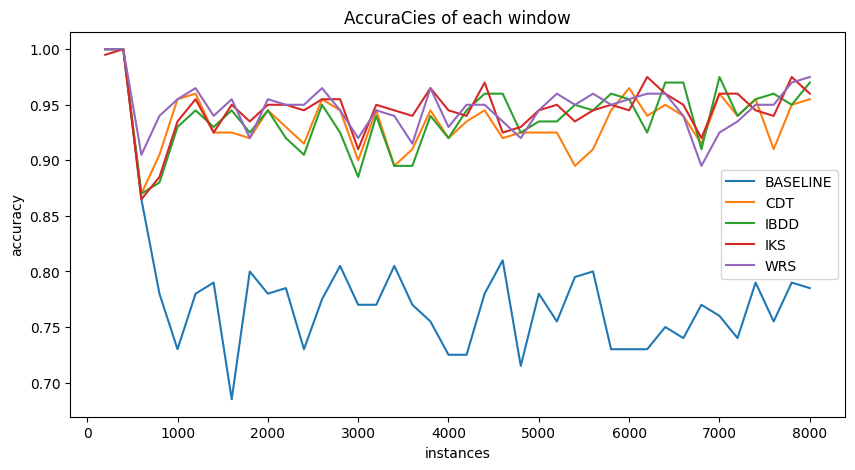

In [535]:
plt.figure(figsize=(10,5))
for file in os.listdir(f"results/"):
    dataset, detector = file.split("_")
    if dataset == dataset_chosen:
        with open(f"results/{file}", "r") as f:
            d = json.load(f)
            if isinstance(d, dict):
                drifts_detected, drifts_detected_at, time, context_portion, classification = d.values()
                
                print(f"{detector.split('.')[0]} -> {drifts_detected_at}")
                final_acc = plot_accuracy(classification, [])
                plt.plot(np.arange(int(window_size), len(dataset_test)+window_size, int(window_size)), 
                         final_acc, 
                         label=detector.split('.')[0])
                
                
                detector_info["detector"].append(detector.split(".")[0])
                detector_info["accuracy"].append(np.round(np.mean(final_acc), 3))
                detector_info["drifts_detected"].append(drifts_detected)
                detector_info["total_time / instance_time (s)"].append(f"{time} / {round(time/len(dataset_test), 3)}")
                detector_info["context_portion"].append(context_portion)                
                
            else:
                proportions = d
                final_prop = plot_proportions(proportions, [])
plt.title("AccuraCies of each window")
plt.xlabel("instances")
plt.ylabel("accuracy")
plt.legend()
plt.show()
    
    

In [536]:
df = pd.DataFrame(detector_info)
df

,detector,accuracy,drifts_detected,total_time / instance_time (s),context_portion
0,BASELINE,0.778,0,215.96 / 0.027,0.000
1,CDT,0.934,2,874.72 / 0.109,0.885
2,IBDD,0.938,6,270.831 / 0.034,0.935
3,IKS,0.946,3,210.961 / 0.026,0.845
4,WRS,0.947,13,359.197 / 0.045,0.235


C:\Users\Luiz Fernando\AppData\Local\Temp\ipykernel_15272\3297535660.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  prop.set_xticklabels(np.arange(int(window_size/2), len(dataset_test), int(window_size/2)))


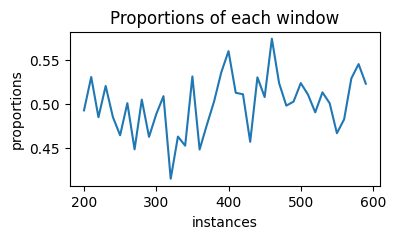

In [537]:
plt.figure(figsize=(4, 2))
prop = sns.lineplot(final_prop)
prop.set_title("Proportions of each window")
prop.set_xlabel("instances")
prop.set_ylabel("proportions")
prop.set_xticklabels(np.arange(int(window_size/2), len(dataset_test), int(window_size/2)))
plt.show()